In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io
import scipy.misc

In [2]:
files = os.listdir('../Dataset-2/')
images = []
flattened_images = []
labels = []

In [3]:
for f in files:
    img = io.imread("../Dataset-2/" + f, as_gray=True)
    labels.append(int(f[2]))
    images.append(img)
    flattened_images.append(img.flatten())

In [4]:
A_transpose = np.array(flattened_images)
A = A_transpose.T
m = np.mean(A, axis=1)

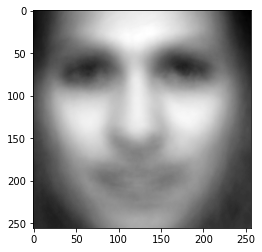

In [5]:
im = m.reshape(256,256)
imgplot = plt.imshow(im, cmap='gray')
plt.show()

In [6]:
Zero_mean_matrix = np.ones((65536,520))
column = 0

for values in flattened_images:
    zm = A[:,column] - m
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] = zm
    column = column + 1

In [7]:
d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/256
u_list =[]
w2, v2 = np.linalg.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)                          
    u = u / np.linalg.norm(u)
    u_i= u.reshape(256,256)
    u_list.append(u_i)

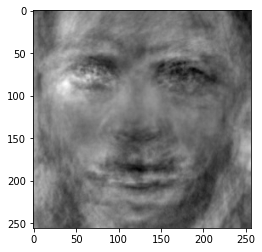

In [8]:
# Eigenfaces
imgplot = plt.imshow(np.array(u_list)[0], cmap='gray')
plt.show()

In [9]:
def Reconstruct(k):
    dict1 ={}
    rec_face=[]
    weights = np.zeros((520,k))
    matrixU = np.zeros((65536,k))
    c =0
    
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c + 1
        
    for face_num in range(0,520):
        print(matrixU.T.shape)
        print(Zero_mean_matrix[:,face_num].shape)
        w = np.dot(matrixU.T ,Zero_mean_matrix[:,face_num])
        weights[face_num,:] = w

        face = np.dot(w, matrixU.T)
        
        minf = np.min(face)
        maxf = np.max(face)
        face = face-float(minf)
        face = face/float((maxf-minf))
        
        face = face + m.T
#         reshape_face = face.reshape(256,256)
        rec_face.append(face)
        
    dict1[k] = weights
    
    return rec_face, weights

In [10]:
data1, data2 = Reconstruct(32)

(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(

(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(65536,)
(32, 65536)
(

In [11]:
labels = np.array(labels)
labels = labels.reshape(-1,1)
# print(labels)

In [12]:
learning_rate = 0.000001
no_iterations = 100000

no_samples, no_features = data2.shape
unique_labels = np.unique(labels)
no_unique_labels = len(unique_labels)

weights = np.ones((no_features, no_unique_labels))
cost_hist = []

for i in range(no_unique_labels):
    train_labels = labels
    train_labels = [1 if train_labels[j] == unique_labels[i] else 0 for j in range(len(labels))]
    for _ in range(no_iterations):
        y_predicted = np.dot(data2, weights)
        dw = (1/no_samples)*(np.dot(data2.T,(y_predicted[:,i]-train_labels)))
        dw = np.real(dw)
        weights[:,i] -= learning_rate*dw

In [13]:
linear_model = np.dot(data2, weights)
y = 1/(1+np.exp(-linear_model))
y_pred = np.argmax(y, axis=1)

In [14]:
y_pred

array([7, 6, 6, 2, 6, 3, 2, 7, 7, 7, 4, 6, 2, 1, 4, 5, 5, 7, 5, 3, 3, 3,
       3, 2, 1, 2, 2, 3, 6, 7, 7, 7, 3, 5, 0, 6, 7, 7, 6, 0, 2, 6, 2, 3,
       6, 7, 7, 4, 2, 6, 4, 1, 0, 4, 2, 5, 4, 7, 7, 4, 0, 6, 6, 7, 0, 4,
       7, 0, 6, 7, 5, 7, 7, 2, 2, 5, 3, 3, 7, 3, 5, 5, 6, 5, 7, 0, 2, 4,
       0, 4, 2, 0, 0, 6, 4, 6, 2, 1, 7, 7, 7, 4, 4, 3, 0, 5, 3, 4, 3, 3,
       3, 3, 3, 3, 1, 5, 6, 2, 2, 4, 2, 7, 7, 4, 5, 5, 4, 6, 0, 0, 2, 0,
       1, 0, 7, 5, 2, 6, 2, 5, 5, 3, 3, 3, 3, 5, 5, 2, 0, 4, 5, 7, 5, 1,
       0, 0, 6, 2, 4, 6, 1, 2, 4, 1, 7, 7, 4, 0, 4, 2, 2, 4, 5, 5, 7, 7,
       3, 6, 5, 1, 5, 6, 6, 5, 4, 4, 7, 7, 3, 5, 0, 6, 3, 0, 4, 4, 0, 4,
       6, 6, 1, 2, 3, 7, 7, 4, 4, 4, 2, 2, 5, 4, 5, 3, 3, 7, 3, 0, 6, 5,
       2, 6, 5, 4, 4, 7, 1, 3, 4, 6, 0, 7, 4, 7, 0, 0, 6, 0, 4, 2, 4, 2,
       4, 5, 5, 3, 3, 4, 3, 5, 5, 2, 6, 4, 4, 6, 4, 0, 0, 0, 0, 0, 1, 6,
       4, 3, 7, 7, 4, 4, 5, 5, 3, 3, 5, 5, 4, 4, 7, 7, 3, 1, 6, 4, 7, 0,
       7, 6, 2, 6, 4, 1, 2, 3, 7, 7, 3, 3, 4, 2, 6,

In [16]:
from sklearn import metrics
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=labels, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=labels, y_pred=y_pred))

accuracy: 0.7696153846153846 

[[30  0  6  1  9  0  7 12]
 [ 6 18  8 11 10  6  5  1]
 [ 4  4 30  3  8  3 13  0]
 [ 3  1  1 40  6  2  1 11]
 [ 1  0  2  5 41  7  5  4]
 [ 5  2  2  4  7 42  3  0]
 [ 8  3  4  1  9  2 33  5]
 [ 0  1  3  2  0  2  0 57]]
